## Particle in a box.

colab 링크: https://colab.research.google.com/drive/1ECLiUQU1LZpm1rb3o7bt407-aCWc_vvy?usp=sharing

Particle in a box는 infinite potential well에 붙잡힌 particle의 Energy state를 계산하는 간단한 문제입니다.

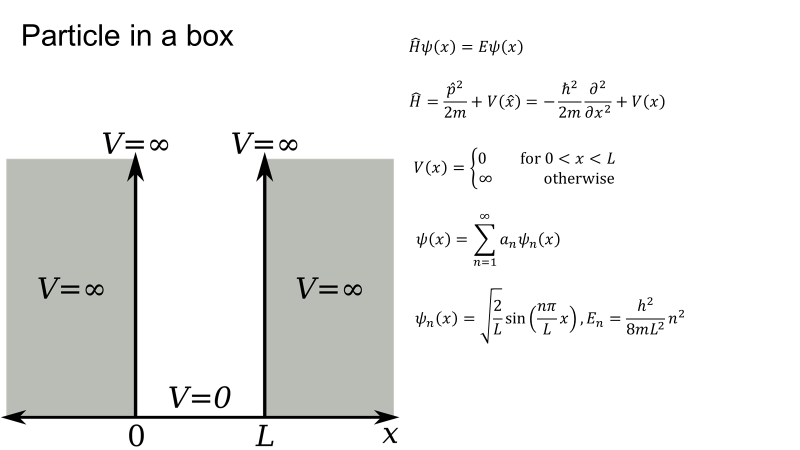

Particle in a box의 경우에 대한 Schrödinger equation을 계산하는 것은 수업시간에 진행했습니다.

위의 결과에서, particle의 위치 x를 특정하게 되는 경우, particle의 energy state(=momentum)을 특정하지 못하고,

반대로 particle의 energy state를 특정하게 되는 경우, particle의 위치를 특정할 수 없게 된다는 사실을 배웠습니다.

이는 Uncertainty principle으로 잘 알려진 결과입니다.

이를 시각적으로 확인시켜주기 위해, 다음과 같은 python code를 작성했습니다.

이는 다음과 같은 식의 결과를 반영하는 결과입니다.

### $$\langle x | y \rangle =  \sum_{m=1}^{\infty} \psi_m(x) \psi_m(y)$$ 

### $$\langle x | y \rangle = \delta(x-y) $$ 

여기에서 $\delta(x-y)$는 [**Dirac delta**](https://www.wikiwand.com/en/Dirac_delta_function) 함수로, 다음과 같은 성질을 가진 함수입니다.

1. $\delta(x)$에서 $x=0$를 제외한 다른 지점에서는 항상 0의 값을 갖는다. $x=0$에서는 무한대로 발산한다. 

$$\delta(x) = \begin{cases} \infty, & \text{if $x=0$}. \\ 0, & \text{otherwise}. \end{cases}$$

2. $\delta(x)$를 전 구간에서 적분을 하게 되면 1이 된다.

$$\int_0^\infty \delta(x) dx = 1$$

3. 위에서 언급한 성질 때문에 다음과 같은 식을 만족한다.

$$\int_0^\infty f(x) \delta(x-y) dx = f(y) \int_0^\infty \delta(x-y) dx = f(y)$$

$\delta(x)$는 물리화학에서 자주 쓰이는 함수이기 때문에 여러분들이 이를 잘 이해하는 것이 중요합니다.

수업시간에 $\delta(x-y)$는 다음과 같은 의미로 사용이 되었습니다.

    "particle in a box에서 particle이 특정 위치 y에 존재함이 명확해졌다.(= particle의 위치는 y이다!)"

하지만 uncertainty principle로 인해 이렇게 위치가 특정이 되는 경우, particle의 momentum이 특정되지 못하고, 이로 인해 우리는 particle의 energy state를 모르게 됩니다.

이번 수업에는 이를 조금 더 이해해보도록 하겠습니다.

밑의 코드는 다음과 같은 식을 계산하는 코드입니다.

### $$f_n(x-y) = \sum_{m=1}^{n} \psi_m(x) \psi_m(y)$$

n의 값이 커짐에 따라 $f_n(x-y)$의 결과가 어떻게 바뀌는지 시각적으로 확인해보시기 바랍니다.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
'''
L : potential well의 width
y : particle의 위치
'''

L = 100
y = 50
x = np.linspace(0,L,100000)

수업시간에 구한 $\psi_n(x)$은 python numpy로 다음과 같이 작성이 가능합니다.

In [5]:
def psi_n(x,n,L):
    return np.sqrt(2/L)*np.sin(n/L*np.pi*x)

위에서 쓴 $f_n(x-y) = \sum_{m=1}^{n} \psi_m(x) \psi_m(y)$을 python으로 다음과 같이 작성할 수 있습니다.

In [6]:
def f(x,y,n,L):
    result = 0
    for m in range(1,n+1):
        result += psi_n(x,m,L)*psi_n(y,m,L)

    return result

위에서 정의한 식을 이용해서 n 값을 바꿔가면서 $f_n(x-y)$를 graph로 그려봤습니다.

Text(0, 0.5, 'PDF')

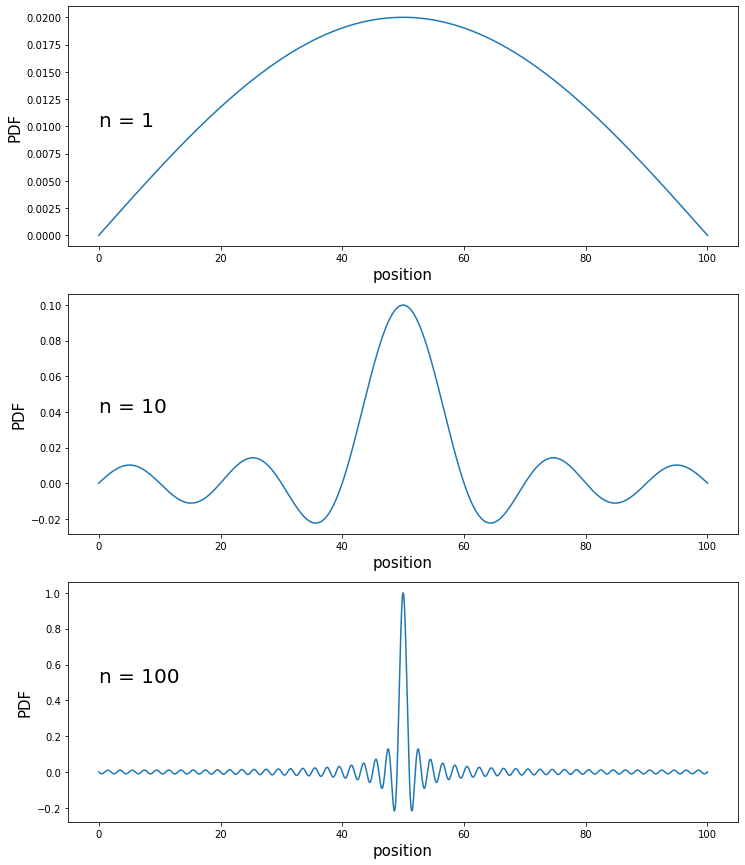

In [5]:
plt.figure(figsize = (12,15))

plt.subplot(3, 1, 1)
number = 1
value_1 = f(x,y,number,L)
plt.text(0,0.01,f'n = {number}',fontsize=20)
plt.plot(x,value_1)
plt.xlabel("position", size = 15)
plt.ylabel("PDF", size = 15)

plt.subplot(3, 1, 2)
number = 10
value_10 = f(x,y,number,L)
plt.text(0,0.04,f'n = {number}',fontsize=20)
plt.plot(x,value_10)
plt.xlabel("position", size = 15)
plt.ylabel("PDF", size = 15)

plt.subplot(3, 1, 3)
number = 100
value_100 = f(x,y,number,L)
plt.text(0,0.5,f'n = {number}',fontsize=20)
plt.plot(x,value_100)
plt.xlabel("position", size = 15)
plt.ylabel("PDF", size = 15)

예상한대로, n 값이 커짐에 따라 $\delta(x-50)$의 결과로 수렴함을 확인할 수 있었습니다.

$y$값을 바꿔서 계산을 하면 어떻게 될까요? 밑의 결과는 $y=10$에 대한 결과입니다.

Text(0, 0.5, 'PDF')

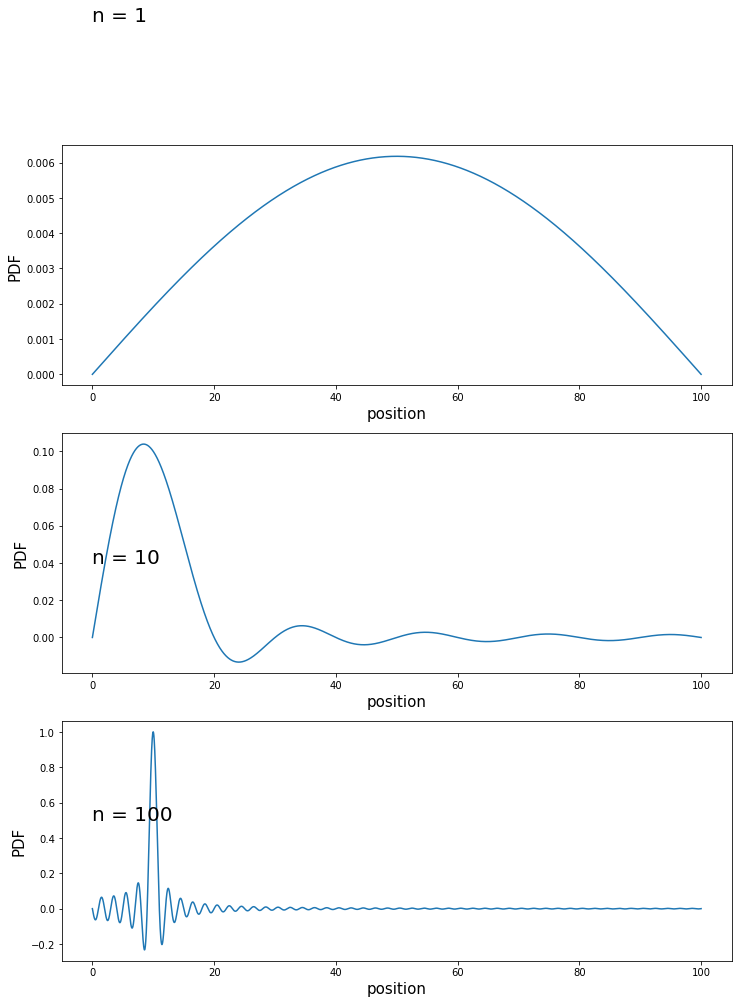

In [6]:
'''
L : potential well의 width
y : particle의 위치
'''

L = 100
y = 10
x = np.linspace(0,L,100000)

plt.figure(figsize = (12,15))

plt.subplot(3, 1, 1)
number = 1
value_1 = f(x,y,number,L)
plt.text(0,0.01,f'n = {number}',fontsize=20)
plt.plot(x,value_1)
plt.xlabel("position", size = 15)
plt.ylabel("PDF", size = 15)

plt.subplot(3, 1, 2)
number = 10
value_10 = f(x,y,number,L)
plt.text(0,0.04,f'n = {number}',fontsize=20)
plt.plot(x,value_10)
plt.xlabel("position", size = 15)
plt.ylabel("PDF", size = 15)

plt.subplot(3, 1, 3)
number = 100
value_100 = f(x,y,number,L)
plt.text(0,0.5,f'n = {number}',fontsize=20)
plt.plot(x,value_100)
plt.xlabel("position", size = 15)
plt.ylabel("PDF", size = 15)

예상한대로, n 값이 커짐에 따라 $\delta(x-10)$의 결과로 수렴함을 확인할 수 있었습니다.

아래의 code는 2의 배수에 해당하는 n에 대해 $f_n(x-y)$의 결과를 구하고, 이를 한번에 모아서 result.gif 파일로 만드는 code입니다. 

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [8]:
'''
L : potential well의 width
y : particle의 위치
'''

L = 100
y = 10
x = np.linspace(0,L,100000)

filenames = []

for m in range(1,15):
    plt.figure(figsize=(12,9))
    plt.plot(x,f(x,y,2**m,L))
    number = 2**m
    plt.text(0, 0, f'n = {number}', fontsize = 20)
    plt.xlabel("position", size = 20)
    plt.ylabel("PDF", size = 20)
    filename = f'{m}.png' # f-string
    filenames.append(filename)
    
    plt.savefig(filename)
    plt.close()
    
with imageio.get_writer('result.gif', mode='I', fps = 1) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

for filename in set(filenames):
    os.remove(filename)

이러한 결과가 뜻하는 바는 무엇일까요?

$f_n(x-y)$의 함수는 n이 커질수록 $\delta(x-y)$에 근접하게 됩니다. 물리적으로 이는 particle이 존재할 수 있는 위치가 점점 좁아져서 $x=y$를 제외한 다른 position에서는 particle이 존재하지 못하게 됨을 의미합니다.

하지만 이를 위해서는 $f_n(x-y) = \sum_{m=1}^{n} \psi_m(x) \psi_m(y)$ 에서 고려해야되는 $\psi_m(x)$, $\psi_m(y)$가 늘어남을 의미합니다. 

각각의 m에 대해 다른 energy state를 갖고 있으니, particle이 가질 수 있는 energy state의 범위가 점점 broad해짐을 볼 수 있죠.

이러한 이유로 particle의 position과 momentum(=energy state)를 동시에 특정지을 수 없게 되는 것입니다.

이는 Heisenberg의 uncertainty principle을 수식적으로 쉽게 보일 수 있는 좋은 예시입니다.

### Question 1. finite한 $n$에서 $\int_0^L f_n(x-y) dx$ 의 값은 어떻게 될까요? ($0<y<L$)

In [7]:
def integrate_f(x,y,n,L):
    result = f(x,y,n,L)
    dx = x[1] - x[0]

    return sum(result)*dx

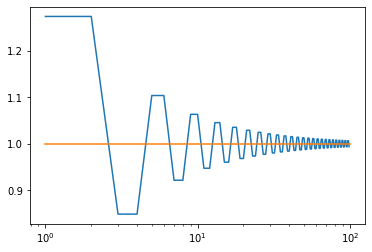

In [9]:
'''
L : potential well의 width
y : particle의 위치
'''

L = 100
y = 50
x = np.linspace(0,L,100000)

numbers = []
integrate_results = []

for i in range(1,100):
    integrate_results.append(integrate_f(x,y,i,L))
    numbers.append(i)

plt.semilogx(numbers, integrate_results)
plt.semilogx([1,100],[1,1])

$n$의 값이 커짐에 따라, 결과값이 1에 수렴한다는 사실을 확인할 수 있습니다.

그렇다면 정말 $n$이 무한대가 될때, 이 값이 analytical하게 1로 수렴하는 것을 보일 수 있을까요?

다음은 analytical한 계산과정입니다.

$$\int_0^L \psi_m(x)\psi_m(y) dx = \frac{2 \left( 1- \left( -1 \right) ^{m} \right)\sin(\frac{m \pi y}{L})}{m\pi}$$

위의 계산결과를 확인해보면 m이 짝수인 경우 적분의 결과는 0이고, 홀수인 경우 $\frac{4 \sin \left( \frac{m \pi y}{L} \right)}{\left( m \pi \right)}$ 이 되는 것을 확인할 수 있습니다.

이 결과를 이용해 $\sum_{m=1}^{\inf} \int_0^L \psi_m(x)\psi_m(y) dx $ 을 계산하게 되면,

$$\sum_{m=1}^{\infty} \int_0^L \psi_m(x)\psi_m(y) dx = \frac{2 i \left( arctanh \left( e^{- \frac{i \pi y}{L}} \right) - arctanh \left( e^{ \frac{i \pi y}{L}} \right) \right)}{\pi} $$

의 결과를 얻게됩니다.

이 결과는 모든 $y$값에 대하여 ($0<y<L$) 항상 1이 나오는 결과입니다.

C:\Users\minho\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


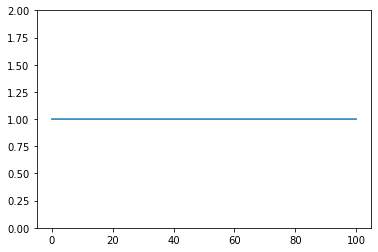

In [15]:
L = 100
epsilon = 0.0001
y = np.linspace(epsilon,L-epsilon,10000)

def infinite_integral_result(y):
    return 2 * 1j * (np.arctanh(np.exp(-1j*np.pi*y/L)) - np.arctanh(np.exp(1j*np.pi*y/L))) / np.pi

plt.plot(y,infinite_integral_result(y))
plt.ylim(0,2)
plt.show()

### Question 2. 위에서 설명한 방법보다 더 쉽게 uncertainty principle을 보일 수 있는 방법이 있나요?

위에서 보인 방법은 시각화를 해서 보여주는 방법입니다. 따라서 손으로 직접 계산해서 보여주기에는 어려운 결과라고 볼 수 있습니다.

좀 더 간단하게 uncertainty principle을 보일 수 있는 방법이 있습니다.

위에서 구한 box속 particle의 energy는 다음과 같습니다.

### $$E_n=\frac{h^2}{8mL^2}n^2$$

box의 size인 L의 값을 점점 줄여나가 0에 가까운 값으로 보내게 될 때, 이 energy 값은 발산하게 됩니다.

L을 줄인다는 것은 particle의 위치를 특정한다는 것으로도 볼 수 있습니다.(젓가락으로 반찬을 집어드는 것을 상상해보세요.)

그렇게 되는 경우 energy 값은 무한대로 발산하게 되고, 이는 particle의 momentum을 특정하지 못하게 됨을 의미합니다.



반대로 box의 size인 L의 값을 매우 큰 값으로 보내게 되는 경우, energy는 0으로 수렴하게 되겠지만, 더이상 particle의 위치를 특정하지 못하게 됩니다.

### 추가적으로 읽어보면 좋을 내용들... (정말 관심이 있다면)

https://www.feynmanlectures.caltech.edu/III_02.html

파인만의 물리학 강의 2-4 The size of an atom 부분을 보게 되면, uncertainty principle을 이용해서 수소 원자의 ionization energy를 매우 쉽게 푸는 예제가 나옵니다.

관심이 있다면 읽어보는걸 추천합니다.